Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [55]:
import pandas as pd
import seaborn as sns

import sqlite3
from sqlite3 import Error
import csv
from sqlalchemy import create_engine

In [73]:
#To join the Bike and Foursquare dataframe
bike_df = pd.read_csv("bike.csv")
bike_df
foursquare_df = pd.read_csv('foursquare.csv')
foursquare_df

# Full outer join
df_join = pd.merge(bike_df, foursquare_df, on=['latitude', 'longitude'], how='outer')

In [74]:
df_join

,latitude,longitude,empty_slots,free_bikes,total_bike_slots,count_of_restaurants
0,54.604948,-5.921534,10,5,15,50
1,54.600337,-5.905516,9,6,15,42
2,54.595315,-5.949091,8,2,10,30
3,54.595840,-5.929881,9,5,14,50
4,54.580556,-5.920504,4,6,10,47
5,54.583901,-5.932810,7,6,13,50
6,54.601319,-5.931308,12,0,12,50
7,54.574854,-5.932134,7,6,13,50
8,54.597573,-5.927663,6,0,6,50
9,54.597142,-5.934827,8,3,11,50


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [75]:
#using seaborn to show relationship between the number of restaurants and the bikes available
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              59 non-null     float64
 1   longitude             59 non-null     float64
 2   empty_slots           59 non-null     int64  
 3   free_bikes            59 non-null     int64  
 4   total_bike_slots      59 non-null     int64  
 5   count_of_restaurants  59 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.9 KB


In [76]:
df_join.describe()
df_join_eda = df_outer[['empty_slots','free_bikes','total_bike_slots', 'count_of_restaurants']]

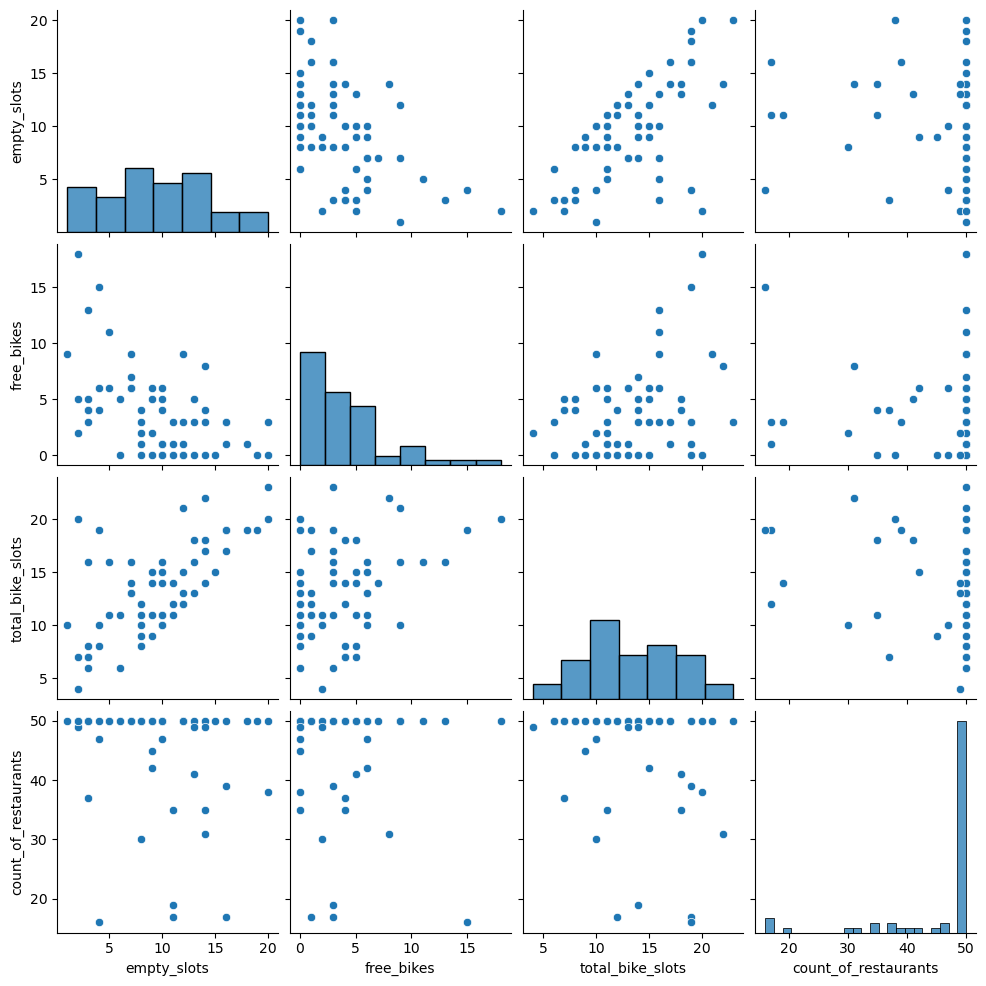

In [77]:
sns.pairplot(df_join_eda)

In [80]:
df_join.to_csv('bikes_foursquare_join.csv', index=False)

Initial pattern or relationship I noticed includes:
1. most bike stations have at least 50 restaurants that are within 1000m away from it.
2. The total bike slots available in a bike station has a positive correlation with empty slots in the station and free bikes in the station
3. On average there are less free bikes in each station 


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [33]:
import sqlite3
from sqlite3 import Error
import csv

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("sm_app.sqlite")


Connection to SQLite DB successful


In [34]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [49]:
import csv
import sqlite3

# Establish connection to SQLite database
connection = sqlite3.connect("project_2.db")
cursor = connection.cursor()

In [50]:
conn = sqlite3.connect('project_2.db')
conn

In [47]:
drop_bike_table = """
DROP TABLE bikes;
"""

drop_foursquare_table = """
DROP TABLE foursquare;
"""

In [51]:
create_bike_table = """
CREATE TABLE IF NOT EXISTS bikes (
  latitude DOUBLE,
  longitude DOUBLE,
  empty_slots INT,
  free_bikes INT,
  total_bike_slots INT,
  PRIMARY KEY (latitude, longitude)
);
"""
create_foursquare_table = """
CREATE TABLE IF NOT EXISTS foursquare(
  Number_Restaurants INT,
  latitude DOUBLE ,
  longitude DOUBLE,
  PRIMARY KEY (latitude, longitude) 
);
""" 


In [52]:
 # Execute table creation queries
cursor.execute(create_bike_table)
cursor.execute(create_foursquare_table)

# Function to insert data from CSV into SQL table
def insert_data_from_csv(csv_file, table_name):
    with open(csv_file, "r", newline="") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row if it exists
        for row in csv_reader:
            cursor.execute(f"INSERT INTO {table_name} VALUES (?, ?, ?)", row)
    connection.commit()


# Insert data from foursquare.csv into foursquare table
insert_data_from_csv("foursquare.csv", "foursquare")


In [53]:
cursor.execute(create_bike_table)
# Function to insert data from CSV into SQL table
def insert_data_from_csv(csv_file, table_name):
    with open(csv_file, "r", newline="") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row if it exists
        for row in csv_reader:
            cursor.execute(f"INSERT INTO {table_name} VALUES  (?, ?, ?, ?, ?)", row)
    connection.commit()


# Insert data from bike.csv into bikes table
insert_data_from_csv("bike.csv", "bikes")

# Close connection
connection.close()

Look at the data before and after the join to validate your data.

In [64]:
connection = create_engine('sqlite:///project_2.db')

# before join
bike_data = '''SELECT * 
                FROM bikes 
                LIMIT 10;'''



bike_df = pd.read_sql_query(bike_data, connection)

bike_df


,latitude,longitude,empty_slots,free_bikes,total_bike_slots
0,54.604948,-5.921534,10,5,15
1,54.600337,-5.905516,9,6,15
2,54.595315,-5.949091,8,2,10
3,54.595840,-5.929881,9,5,14
4,54.580556,-5.920504,4,6,10
5,54.583901,-5.932810,7,6,13
6,54.601319,-5.931308,12,0,12
7,54.574854,-5.932134,7,6,13
8,54.597573,-5.927663,6,0,6
9,54.597142,-5.934827,8,3,11


In [65]:
foursquare_data = '''SELECT * FROM foursquare
                    LIMIT 10;'''
foursquare_df = pd.read_sql_query(foursquare_data, connection)
foursquare_df

,Number_Restaurants,latitude,longitude
0,50,54.572534,-5.915076
1,50,54.574854,-5.932134
2,50,54.575364,-5.955373
3,50,54.576116,-5.942574
4,17,54.577839,-5.881805
5,49,54.578142,-5.918787
6,47,54.580556,-5.920504
7,50,54.581962,-5.977871
8,49,54.583056,-5.956993
9,50,54.583901,-5.932810


In [72]:
#After Join - using inner join
join_bike_foursquare = '''
SELECT f.latitude,
        f.longitude,
        f.Number_Restaurants,
        b.total_bike_slots AS total_slot_in_station

FROM foursquare as f
JOIN bikes as b
ON f.latitude = b.latitude 
AND f.longitude = b.longitude;
'''

join_df = pd.read_sql_query(join_bike_foursquare, connection)
join_df

,latitude,longitude,Number_Restaurants,total_slot_in_station
0,54.572534,-5.915076,50,16
1,54.574854,-5.932134,50,13
2,54.575364,-5.955373,50,7
3,54.576116,-5.942574,50,20
4,54.577839,-5.881805,17,12
5,54.578142,-5.918787,49,4
6,54.580556,-5.920504,47,10
7,54.581962,-5.977871,50,7
8,54.583056,-5.956993,49,13
9,54.583901,-5.932810,50,13
